# Lab 8 : Star Formation 

In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [2]:
def StarFormationRate(L, Type, TIR=0):
    """This function that computes the star formation rate of a galaxy 
    following the papre Kennicutt and Evans 2012, eqn 12 (AR&R vol no. 50)
    
    Inputs:
        L : 'float'
            lumiosity of a galaxy in a given waveband (erg/s)
      
        Type : 'string'
            the wavelength - 'FUV', 'NUV', 'TIR', 'Halpha'
      
        TIR : 'float' 
            total infrared luniosity in erg/s (defualt=0)
      
     Outputs:
        SFR :'float' 
            log of star formation rate (Msun/yr)
    """
    if (Type == 'FUV'):
        logCx = 43.35 # calibration from table 1 (K&E 2012)
        TIRc= 0.46  # correction for dust absorption from paper table 2(K&E 2012)
    elif(Type == 'NUV'):
        logCx = 43.17
        TIRc= 0.27
    elif(Type == 'Halpha'):
        logCx = 41.27
        TIRc= 0.0024     
    elif(Type == 'TIR'):
         logCx = 43.41
         TIRc = 0 # as we are already in infrared so no correction for infrared
    elif(Type == 'NUV'):
        print("Missing wavelength : FUV, NUV, Halpha, TIR")
    
    #Correct the luminoisty for dust using TIR
    Lnew = L + TIRc*TIR
    
    #star formation rate
    
    SFR= np.log10(Lnew)- logCx
    
    return SFR

Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [4]:
#  WLM Dwarf Irregular Galaxy
# From NED : WLM NUV Lumonisyty 1.71e7 Lsun
# From NED : WLM TIR luminosity 2.48e6 Lsun
# From NED : WLM FIR Luminosity 7.48e5 Lsun


NUV_WLM= 1.71e7

LsunErgS= const.L_sun.to(u.erg/u.s).value
print(LsunErgS)

NUV_WLM= 1.71e7*LsunErgS
TIR_WLM= 2.46e6*LsunErgS+ 7.84e5*LsunErgS

print(StarFormationRate(NUV_WLM, 'NUV',TIR_WLM))

3.828e+33
-2.3323379106558946


In [ ]:
#  N24 Sc galaxy


# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift. 

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [5]:
def SFRMainSequence(Mstar,z):
    """ Function that computes the avergae sfr of a galaxy as a function of stellar mass
    
    INPUTS :
        Mstar : 'float'
                Stellar mass of the galaxy in Msun
        
        z: 'float'
            redshift
            
    OUTPUTS :
        logSFR : 'float'
                log(SFR(Msun/yr))
    """
    
    alpha= 0.7-0.13*z
    beta= 0.38 +1.14*z- 0.19*z**2
    
    logSFR= alpha*(np.log10(Mstar)-10.5)+beta
    
    return logSFR

# Step 2

In [6]:
# MW at z=0

MW_disk = 8e10

print(10**SFRMainSequence(MW_disk, 0))

4.5937038237959715


In [7]:
# MW at z = 1

print(10**SFRMainSequence(MW_disk, 1))

36.287854588142594


# Step 3

In [8]:
# create an array of stellar masses
Mass = np.linspace(1e9, 1e12)

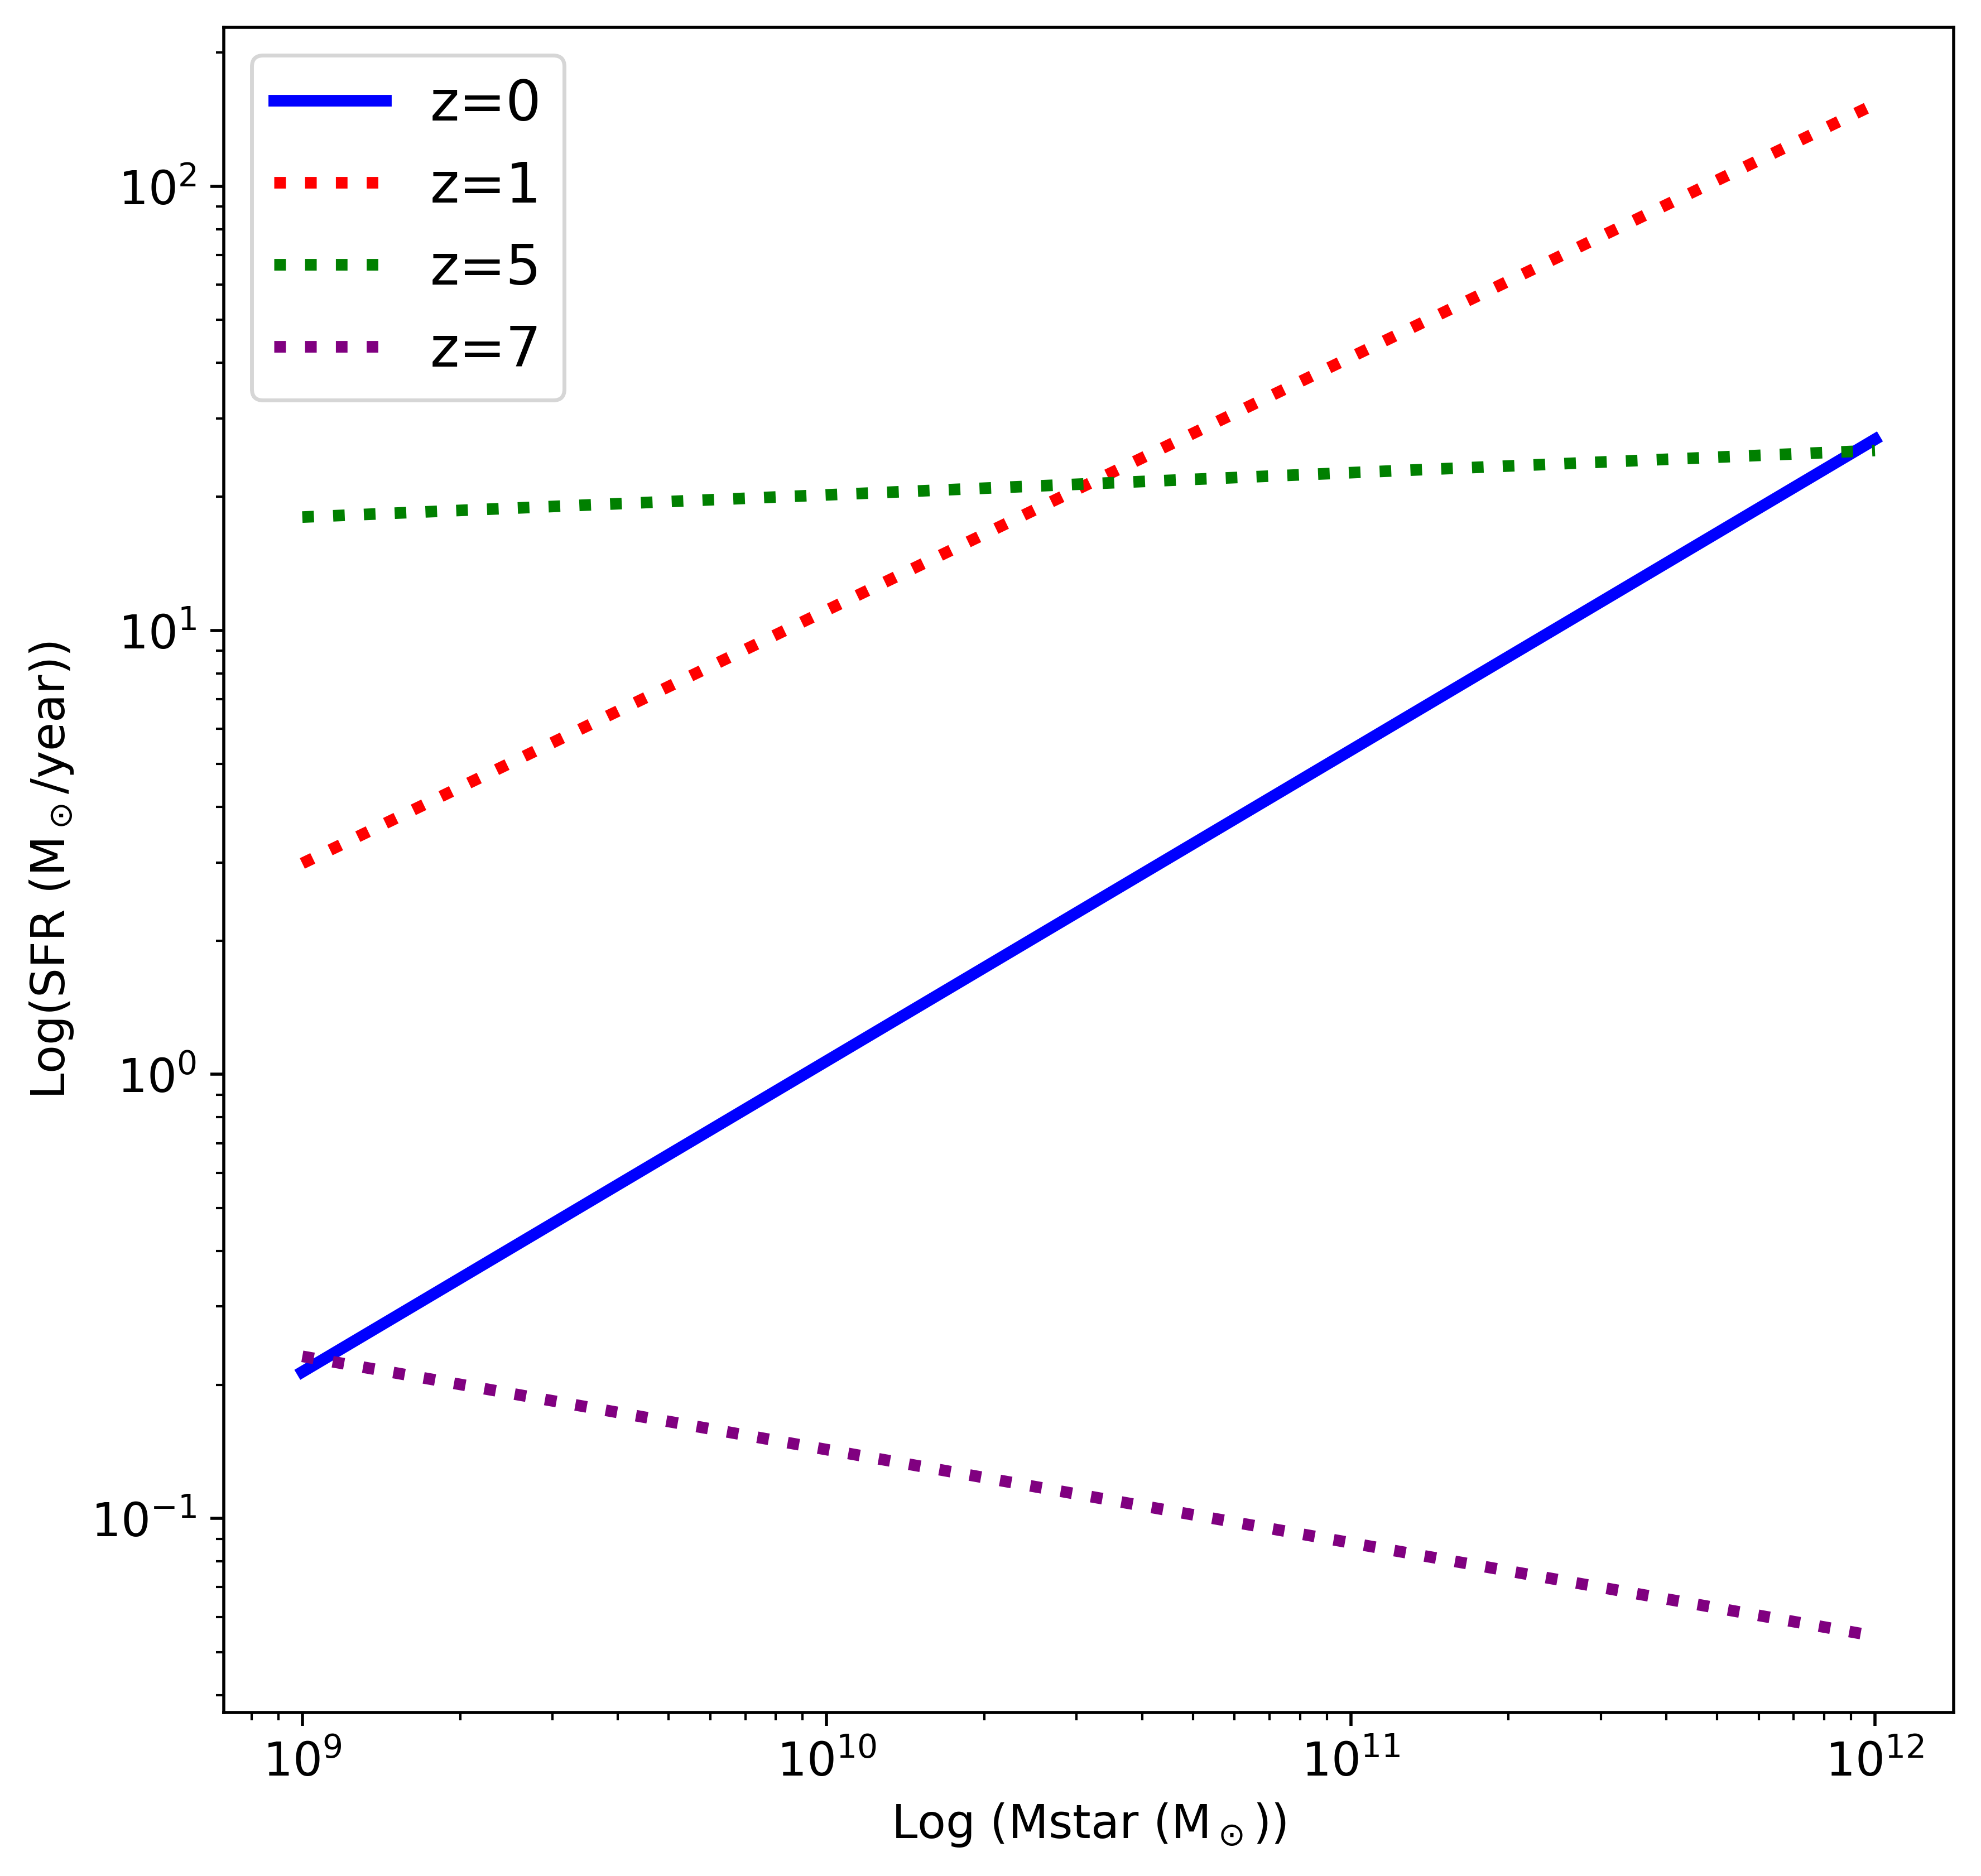

In [13]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(Mass, 10**SFRMainSequence(Mass,0), color="blue", linewidth=3, label='z=0')

plt.loglog(Mass, 10**SFRMainSequence(Mass,1), color="red", linewidth=3, label='z=1', linestyle='dotted')
plt.loglog(Mass, 10**SFRMainSequence(Mass,5), color="green", linewidth=3, label='z=5', linestyle='dotted')
plt.loglog(Mass, 10**SFRMainSequence(Mass,7), color="purple", linewidth=3, label='z=7', linestyle='dotted')
# plt.loglog(Mass, 10**SFRMainSequence(Mass,12), color="hotpink", linewidth=3, label='z=12', linestyle='dotted')

# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [14]:
# normal galaxies 

TIR_Normal = 1e10*LsunErgS
print(10**StarFormationRate(TIR_Normal, "TIR"))

1.4892648150381245


In [16]:
# LIRGs  

TIR_LIRG = 1e11*LsunErgS
print(10**StarFormationRate(TIR_LIRG, "TIR"))

14.892648150381245


In [17]:
# ULIRGs

TIR_ULIRG = 1e12*LsunErgS
print(10**StarFormationRate(TIR_ULIRG, "TIR"))

148.92648150381245


In [18]:
# HLIRGs

TIR_HLIRG = 1e13*LsunErgS
print(10**StarFormationRate(TIR_HLIRG, "TIR"))

1489.2648150381244
